Max-Sum equations
--

\begin{align*}
u_{ai}\left(\sigma_{i}\right)= &\sigma_{i}f_{ai}+g_{ai}\\
u_{ai}\left(\sigma_{i}\right)= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}u_{ja}\left(\sigma_{j}\right)+\sigma_{j}s_{j}+const\\
b_{i}\left(\sigma_{i}\right)= & u_{ai}\left(\sigma_{i}\right)+u_{bi}\left(\sigma_{i}\right)+\sigma_{i}s_{i}+const=b_{i}\sigma_{i}+const\\
b_{i}= & \frac{1}{2}\left[f_{ai}+f_{bi}+s_{i}-\left(-f_{ai}-f_{bi}-s_{i}\right)\right]\\
= & f_{ai}+f_{bi}+s_{i}\\
\sigma_{i}f_{ai}= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}f_{ja}\sigma_{j}+\sigma_{j}s_{j}+const\\
f_{ai}= & \frac{1}{2}\left[\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)-\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=-1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)\right]\\
= & \frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}-\\
 & -\frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0
\end{cases}\\
= & \begin{cases}
\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
-\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}
\end{align*}

So we get
$$f_{ai}= \min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|\prod_{j\in\partial a\setminus i}\text{sign}\left(f_{ja}+s_{j}\right)$$


Distribution in the quenched disorder
---

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
=& \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\sum_{s_j}p\left(f_{j}+s_j\right)\\
\end{align*}

In [68]:
using OffsetArrays


function iter_slow(p,K)
    N = lastindex(p)
    p1 = copy(p)
    p1 .= 0
    S = CartesianIndices(Tuple(fill(0:1,K-1)))
    for F in CartesianIndices(Tuple(fill(-N:N,K-1)))
        ff = Tuple(F)
        P = prod(p[fi] for fi in ff)
        for fs in map(s -> ff .+ (2 .* Tuple(s) .- 1), S)
            f = minimum(abs.(fs))*sign(prod(fs))
            #println("$ff $fs $f $P")
            p1[clamp(f, -N, N)] += P
        end
    end
    p1 / sum(p1)
end

iter_slow (generic function with 1 method)

Simplifications
--

$$f = \min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^k\text{sign}\left(f_{j}+s_{j}\right)$$

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
= & \sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\frac{1}{2}\sum_{s_{j}}p\left(f_{j}-s_{j}\right)\\
= & \begin{cases}
\frac{1}{2}\sum_{f_{1},\dots,f_{k}>0}\delta\left(f;\min_{j=1,\dots,k}f_{j}\right)\prod_{j=1}^{k}\sum_{s_{j}}p\left(f_{j}-s_{j}\right) & \text{ for }f>0\\
\sum_{n=1}^{k}\binom{k}{n}\left(\frac{1}{2}\sum_{s_{j}}p\left(s_{j}\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'-s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\sum_{n=1}^{k}\binom{k}{n}\left(\frac{1}{2}\sum_{s}p\left(s\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'+s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\left(\frac{1}{2}\sum_{s\in\pm1}p\left(s\right)+\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k} & \text{ for }f=0
\end{cases}
\end{align*}


In [23]:
function iter(p,K)
    k = K - 1
    p1 = copy(p)
    p1 .= 0.0
    N = lastindex(p1)-1
    for f = 1:N
        v1 = p[f+1]+p[f-1]
        v2 = sum((p[f1+1]+p[f1-1] for f1=f+1:N), init=0.0)
        v = (v1+v2)^k-v2^k
        p1[+f] = v/2
        p1[-f] = v/2
    end
    v1 = (p[1]+p[-1])/2
    v2 = sum(p[f1+1]+p[f1-1] for f1=1:N)
    p1[0] = (v1+v2)^k-v2^k
    p1 ./ sum(p1)
end

iter (generic function with 1 method)

Comparison
--

In [69]:
N=7
N1 = 8
p=OffsetArray(zeros(2N1+1), -N1:N1);
p[-N+1:N-1] .= 1/(2N-1)
q1 = copy(p)
q2 = copy(p)

for i=1:10
    q1 = iter_slow(q1,3)
    q2 = iter(q2,3)
end
[q1[-N:N] q2[-N:N]]

15×2 Matrix{Float64}:
 1.82615e-52  1.74776e-52
 3.33866e-27  3.31785e-27
 6.99126e-14  6.98397e-14
 3.49772e-7   3.49759e-7
 0.000847722  0.000847676
 0.0399563    0.039957
 0.245227     0.245223
 0.427938     0.427943
 0.245227     0.245223
 0.0399563    0.039957
 0.000847722  0.000847676
 3.49772e-7   3.49759e-7
 6.99126e-14  6.98397e-14
 3.33866e-27  3.31785e-27
 1.82615e-52  1.74776e-52

In [25]:
function findsolution(k)
    err = Inf
    N=6
    p=OffsetArray(zeros(2N+3), -N-1:N+1);
    p[-N+1:N-1] .= 1/(2N+1)
    p ./= sum(p);
    while err > 1e-15
        q = iter(p,k)
        err = maximum(abs.(q-p))
        p = 0.1q + 0.9p
    end
    @show k, err
    p
end

findsolution (generic function with 1 method)

Free Energy
--

\begin{align*}
-F_{a} & =\frac{1}{\beta}\log\sum_{\sigma:sat}\prod_{i\in\partial a}\frac{e^{\beta\left(f_{bi}+s_{i}\right)\sigma_{i}}}{2\cosh\left(\beta f_{bi}\right)}\\
 & =\frac{1}{\beta}\log\sum_{\sigma:sat}e^{\beta\sum_{i\in\partial a}\left(f_{bi}+s_{i}\right)\sigma_{i}}-\frac{1}{\beta}\sum_{i\in\partial a}\log2\cosh\left(\beta f_{bi}\right)\\
 & \to\max_{\sigma:sat}\sum_{i\in\partial a}\left(f_{bi}+s_{i}\right)\sigma_{i}-\sum_{i\in\partial a}\left|f_{bi}\right|\\
 & =\sum_{i\in\partial a}\left\{ \left|f_{bi}+s_{i}\right|-\left|f_{bi}\right|\right\} -\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|\\
 & =\sum_{i\in\partial a}\left\{ \left|f_{bi}+s_{i}\right|-\left|f_{bi}\right|\right\} -\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|\\
-F_{i} & =\frac{1}{\beta}\log\sum_{\sigma_{i}}\frac{e^{\beta\sigma_{i}\left(f_{ai}+f_{bi}+s_{i}\right)}}{2\cosh\left(\beta f_{ai}\right)2\cosh\left(\beta f_{bi}\right)}\\
 & =\frac{1}{\beta}\log\sum_{\sigma_{i}}e^{\beta\sigma_{i}\left(f_{ai}+f_{bi}+s_{i}\right)}-\frac{1}{\beta}\log2\cosh\left(\beta f_{ai}\right)-\frac{1}{\beta}\log2\cosh\left(\beta f_{bi}\right)\\
 & \to\left|f_{ai}+f_{bi}+s_{i}\right|-\left|f_{ai}\right|-\left|f_{bi}\right|\\
F &= \sum_{a}F_{a}-\sum_{i}F_{i}
\end{align*}

So we get the overlap:

$$O=-F= -\sum_{a}F_{a}+\sum_{i}F_{i}$$


In [70]:
function overlap_slow(p,K)
    N = lastindex(p)
    O = 0.0
    S = CartesianIndices(Tuple(fill(0:1,K)))
    for ff in map(Tuple, CartesianIndices(Tuple(fill(-N:N,K))))
        P = prod(p[fi] for fi in ff) / 2^K
        for fs in map(s -> ff .+ (2 .* Tuple(s) .- 1), S)
            O += P*sum(abs.(fs))
            if prod(fs) < 0
                O -= P*2*minimum(abs.(fs))
            end
        end
    end
    O *= 2/K
    for f1=-N:N
        for f2=-N:N
            for s = (-1,1)
                O -= p[f1]*p[f2]*0.5*(abs(f1+f2+s))
            end
        end
    end
    O
end

overlap_slow (generic function with 1 method)

*Simplifications for the overlap*

* On a single instance (by rearranging the sums)

$O=-\frac{1}{n}\sum_{a=1}^m\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|+\frac{1}{n}\sum_{i=1}^n\left(|f_{bi}+s_i|+|f_{ai}+s_i|-|f_{ai}+f_{bi}+s_i|\right)$

* Averaging over the graph and source (for an arbitrary factor degree profile $P(X)$)
\begin{align*}
O^{RS} &= \sum_s\frac{1}{2}\sum_{f_1,f_2}\left(|f_1+s|+|f_2+s|-|f_1+f_2+s|\right)p(f_1)p(f_2) \\
&- \frac{2}{P'(1)}\sum_{k=0}^{\infty}P_k\sum_{f_1,\dots,f_k}\sum_{s_1,\dots,s_k}\frac{1}{2^k}\Theta\left(-\prod_{i=1}^k\left(f_i+s_i\right)\right)2\min_{i=1,\dots,k}\left|f_i+s_i\right|\prod_{i=1}^k p(f_i)\\
\end{align*}
* The second term can be simplified:
\begin{align*}
&\sum_{f_1,\dots,f_k}\sum_{s_1,\dots,s_k}\frac{1}{2^k}\Theta\left(-\prod_{i=1}^k\left(f_i+s_i\right)\right)2\min_{i=1,\dots,k}\left|f_i+s_i\right|\prod_{i=1}^k p(f_i)\\
=& \sum_{f_1,\dots,f_k} \Theta\left(-\prod_{i=1}^k f_i\right)2\min_{i=1,\dots,k}|f_i|\prod_{i=1}^k\left(\sum_{s_i}\frac{1}{2}p(f_i-s_i)\right)\\
=& \sum_{f_1,\dots,f_k>0}\min_{i=1,\dots,k}(f_i)\prod_{i=1}^k\left(\sum_{s_i}p(f_i-s_i)\right)\\
=& \sum_{f>0}f\sum_{n=1}^k{k\choose n}\left(\sum_s p(f-s)\right)^n\left(\sum_{f'>f}\sum_s p(f'-s)\right)^{k-n} \\
=& \sum_{f>0}f\left\{ \left(\sum_{f'\geq f}\sum_s p(f'-s)\right)^k - \left(\sum_{f'>f}\sum_s p(f'-s)\right)^k\right\}
\end{align*}

*RS equations for an arbitrary factor degree profile $P(X)$*

\begin{align*}
p\left(f\right)=\sum_{k=0}^{\infty}\tilde{P_k}\frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)
\end{align*}
with the residual degree profile 
\begin{align*}
\tilde{P_k}=\frac{(k+1)P_{k+1}}{P'(1)}
\end{align*}
Using the simplifications below:
\begin{align*}
p\left(f\right)=\sum_{k=0}^{\infty}\tilde{P_k}\begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\left(\frac{1}{2}\sum_{s\in\pm1}p\left(s\right)+\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k} & \text{ for }f=0
\end{cases}
\end{align*}

In [71]:
using OffsetArrays

function overlap(p,k)
    O = 0.0
    N = lastindex(p)-1
    for f1=-N:N
        for f2=-N:N
            for s = (-1,1)
                O += p[f1]*p[f2]*0.5*(abs(f1+s)+abs(f2+s)-abs(f1+f2+s))
            end
        end
    end
    tmp = 0.0
    for f = 1:N-1
        v1 = p[f+1]+p[f-1]
        v2 = sum(p[f1+1]+p[f1-1] for f1=f+1:N)
        v = (v1+v2)^k-v2^k
        tmp += f*v
    end
    O -= tmp*2/k
    O
end

overlap (generic function with 1 method)

In [81]:
p=findsolution(3)
[overlap_slow(p,3) overlap(p,3)]

(k, err) = (3, 9.992007221626409e-16)


1×2 Matrix{Float64}:
 0.580759  0.580759

In [77]:
distortion(K) = (1-overlap(findsolution(K), K))/2

distortion (generic function with 1 method)

In [82]:
Ks = 3:100
D = distortion.(Ks)
R = 1 .- 2 ./ Ks

[R D]

(k, err) = (3, 9.992007221626409e-16)
(k, err) = (4, 9.992007221626409e-16)
(k, err) = (5, 8.881784197001252e-16)
(k, err) = (6, 9.992007221626409e-16)
(k, err) = (7, 9.992007221626409e-16)
(k, err) = (8, 8.881784197001252e-16)
(k, err) = (9, 9.992007221626409e-16)
(k, err) = (10, 9.992007221626409e-16)
(k, err) = (11, 8.881784197001252e-16)
(k, err) = (12, 6.661338147750939e-16)
(k, err) = (13, 3.469446951953614e-16)
(k, err) = (14, 7.771561172376096e-16)
(k, err) = (15, 8.881784197001252e-16)
(k, err) = (16, 8.881784197001252e-16)
(k, err) = (17, 9.992007221626409e-16)
(k, err) = (18, 7.771561172376096e-16)
(k, err) = (19, 8.881784197001252e-16)
(k, err) = (20, 8.881784197001252e-16)
(k, err) = (21, 8.881784197001252e-16)
(k, err) = (22, 8.881784197001252e-16)
(k, err) = (23, 8.881784197001252e-16)
(k, err) = (24, 8.881784197001252e-16)
(k, err) = (25, 6.661338147750939e-16)
(k, err) = (26, 7.771561172376096e-16)
(k, err) = (27, 5.551115123125783e-16)
(k, err) = (28, 9.99200722162640

98×2 Matrix{Float64}:
 0.333333  0.209621
 0.5       0.141487
 0.6       0.105593
 0.666667  0.0830604
 0.714286  0.0676468
 0.75      0.0565155
 0.777778  0.0481531
 0.8       0.0416759
 0.818182  0.0365343
 0.833333  0.03237
 0.846154  0.0289401
 0.857143  0.0260744
 0.866667  0.0236504
 ⋮         
 0.977528  0.00164242
 0.977778  0.00161386
 0.978022  0.00158609
 0.978261  0.00155908
 0.978495  0.0015328
 0.978723  0.00150723
 0.978947  0.00148234
 0.979167  0.0014581
 0.979381  0.00143449
 0.979592  0.00141149
 0.979798  0.00138908
 0.98      0.00136723

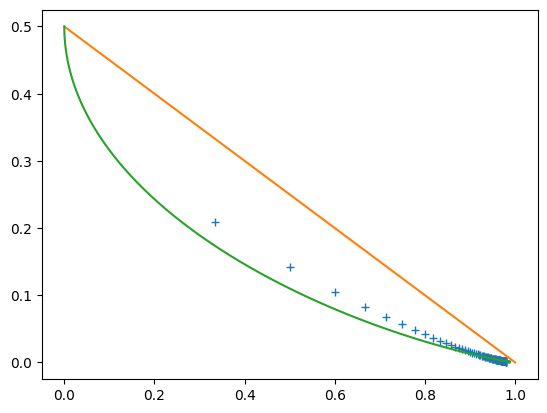

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f604a66d280>

In [80]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)

#xlim(0,1)
#ylim(0,0.5)
plot(R,D, "+")
plot((0,1),(0.5,0))
plot(H.(0:0.001:0.5), 0:0.001:0.5)